In [ ]:
import pandas as pd
import numpy as np

# 1. Business Understanding
Source : https://www.kaggle.com/competitions/titanic

# 2. Data Understanding

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Course Files/Course-Net/02. Kampus Merdeka/03. Classification/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Variable and	Definition__
1. survival :	Survival	(0 = No, 1 = Yes)
2. pclass :	Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
3. sex :	Sex
4. Age :	Age in years
5. sibsp :	# of siblings / spouses aboard the Titanic
6. parch :	# of parents / children aboard the Titanic
7. ticket :	Ticket number
8. fare :	Passenger fare
9. cabin :	Cabin number
10. embarked :	Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

# 3. Data Preparation

## 3.1. Handling Missing Value
Secara umum, ada 2 approach yang dipakai untuk handling missing value, diantaranya :
- drop kolom/baris yang ada missing value-nya
- impute missing value based on assumption, biasanya jika maximum missing value < 30%, selainnya di drop saja kolomnya.

In [ ]:
100*df.isna().sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Action to take :
- kolom `Cabin` di drop karena missing valuenya > 30%
- `Age` dan `Embarked` di impute

### Tips For Missing Value dengan Mean, Median, dan Modus

__Mean__
<br>Jika datanya numerical dan berdistribusi normal, dimana nilai-nilainya terkonsentrasi di sekitar mean, maka mensubtitusi missing value dengan mean adalah pilihan terbaik Namun dalam beberapa kondisi mean akan menjadi pilihan yang kurang baik bahkan tidak tepat. Misalnya ketika distribusinya tidak normal (nilai-nilainya terkonsentrasi di bagian tertentu) atau adanya outlier yang dapat mempengaruhi mean.

__Median__
<br>Jika datanya numerical dan apabila terdapat skew yang significant pada data ataupun memiliki outlier yang cukup berpengaruh pada distribusi data, maka menggunakan median pada kasus ini lebih tepat untuk meminimalisir magnitude dari skew dan outlier tersebut.

__Modus__
<br>Digunakan pada numerical dengan variansi yang kecil atau tipe data categorical, atau dapat diisi dengan "MISSING".



> Note :<br>Tujuan pemakaiannya semata-mata hanya untuk mempertahankan distribusi data, namun hasilnya tidak dapat divalidasi kebenarannya.

In [ ]:
df = df.drop(columns = ['Cabin'])

In [ ]:
median_age = np.nanmedian(df['Age'])
df['Age'].fillna(median_age,inplace=True)

In [ ]:
modus_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(modus_embarked,inplace=True)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 3.2. Drop Unnecessary Columns

In [ ]:
## kolom data yang berisikan value yang unique untuk setiap row datanya selalu tidak memberikan efek yang signifikan
dropped_columns = ['PassengerId','Name','Ticket']

df = df.drop(columns=dropped_columns)

## 3.2. Convert Categorical to Numerical Value

In [ ]:
# OneHotEncoder
df = pd.get_dummies(df)

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


## 3.3. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['Survived'])
y = df.Survived

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
y_train.value_counts(normalize=True)

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

# 4. Modeling

## 4.1. KNN
the less `k`, the more model complexity

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train,y_train)
model_knn.score(X_train,y_train)

0.8061797752808989

In [ ]:
score_train   = []
score_test    = []
list_neighbors = np.arange(1,20,1)

for k in list_neighbors:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train,y_train)

    score_train.append(model_knn.score(X_train,y_train))
    score_test.append(model_knn.score(X_test,y_test))


import matplotlib.pyplot as plt
plt.plot(list_neighbors,score_train,label='train')
plt.plot(list_neighbors,score_test,label='test')
plt.xticks(list_neighbors)
plt.legend()

## 4.2. SVM
the more `C`, the more complexity model

In [ ]:
model_svm = SVC(C=0.1)
model_svm.fit(X_train,y_train)
model_svm.score(X_train,y_train)

0.6924157303370787

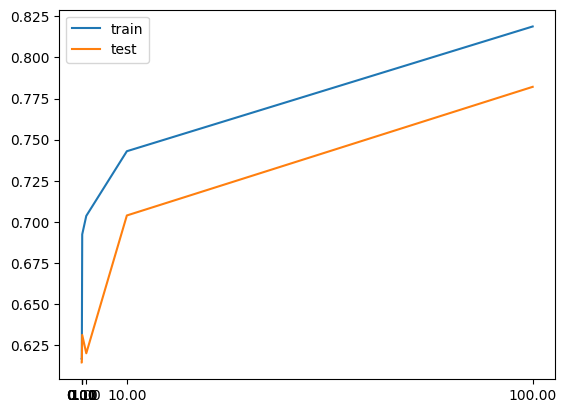

In [ ]:
score_train   = []
score_test    = []
list_C        = [0.0001,0.001,0.01,0.1,1,10,100]

for k in list_C:
    model_svm = SVC(C=k)
    model_svm.fit(X_train,y_train)

    score_train.append(model_svm.score(X_train,y_train))
    score_test.append(model_svm.score(X_test,y_test))


import matplotlib.pyplot as plt
plt.plot(list_C,score_train,label='train')
plt.plot(list_C,score_test,label='test')
plt.xticks(list_C)
plt.legend()

## 4.3. Decision Tree
- The more `max_depth`, the more complexity model
- The less `min_samples_leaf` the more complexity model

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=2)

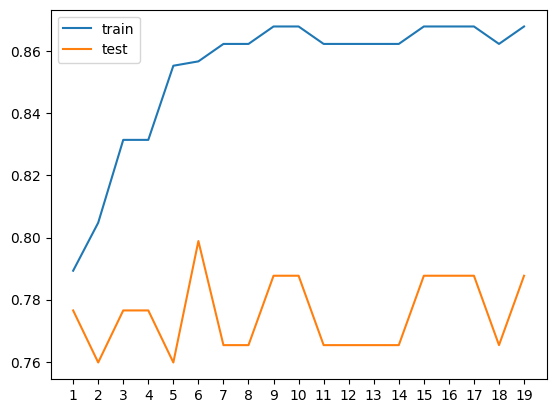

In [ ]:
score_train   = []
score_test    = []
list_max_depth = np.arange(1,20,1)

for k in list_max_depth:
    model_dt = DecisionTreeClassifier(max_depth=k,min_samples_leaf=10)
    model_dt.fit(X_train,y_train)

    score_train.append(model_dt.score(X_train,y_train))
    score_test.append(model_dt.score(X_test,y_test))


import matplotlib.pyplot as plt
plt.plot(list_neighbors,score_train,label='train')
plt.plot(list_neighbors,score_test,label='test')
plt.xticks(list_neighbors)
plt.legend()

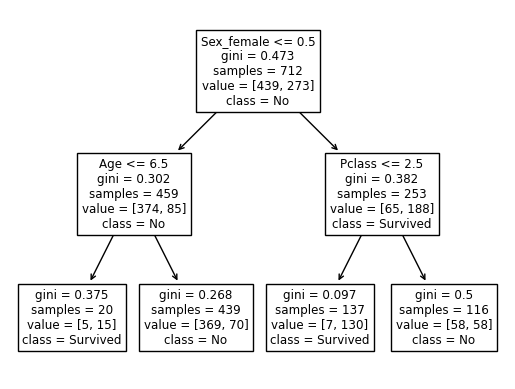

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=2,min_samples_leaf=20)
model_dt.fit(X_train,y_train)

from sklearn.tree import plot_tree
plot_tree(model_dt,feature_names=X_train.columns,class_names=['No','Survived']);

# 5. Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import classification_report

def model_performance(model):
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    print('Model Performance on Data Training')
    print(classification_report(y_train,y_train_pred))

    print('Model Performance on Data Testing')
    print(classification_report(y_test,y_test_pred))

In [ ]:
model_performance(model_dt)

Model Performance on Data Training
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       439
           1       0.92      0.53      0.67       273

    accuracy                           0.80       712
   macro avg       0.85      0.75      0.77       712
weighted avg       0.83      0.80      0.79       712

Model Performance on Data Testing
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       110
           1       0.86      0.46      0.60        69

    accuracy                           0.77       179
   macro avg       0.80      0.71      0.72       179
weighted avg       0.79      0.77      0.74       179

